In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sensor-nodes.csv")

In [4]:
df.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-23 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-23 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-23 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-23 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-23 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [5]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [7]:
sequence_length = X_train.shape[1]
num_features = 1

X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_val_reshaped = np.expand_dims(X_val, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)

Sequence length:  17
Num of features:  1


In [8]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, num_features)))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
adam_optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

adam_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
188/188 [==============================] - 3s 8ms/step - loss: 0.1037 - accuracy: 0.9818 - val_loss: 0.0115 - val_accuracy: 0.9970
Epoch 2/10
188/188 [==============================] - 1s 6ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 3.1150e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9990
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 1.7829e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 6/10
188/188 [==============================] - 1s 5ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - loss: 5.2273e-04 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0

In [10]:
nadam_optimizer = Nadam(learning_rate=0.001)

model.compile(optimizer=nadam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

nadam_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
188/188 [==============================] - 3s 8ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 6.7161e-04 - val_accuracy: 1.0000
Epoch 2/10
188/188 [==============================] - 1s 6ms/step - loss: 1.3994e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 3/10
188/188 [==============================] - 1s 6ms/step - loss: 4.8649e-05 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 4/10
188/188 [==============================] - 1s 6ms/step - loss: 3.4596e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9995
Epoch 5/10
188/188 [==============================] - 1s 6ms/step - loss: 2.5757e-05 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 6/10
188/188 [==============================] - 1s 6ms/step - loss: 1.9841e-05 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 7/10
188/188 [==============================] - 1s 6ms/step - loss: 1.5516e-05 - accuracy: 1.0000 - val_loss: 0.0028 -

In [11]:
adagrad_optimizer = Adagrad(learning_rate=0.001)

model.compile(optimizer=adagrad_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

adagrad_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
188/188 [==============================] - 3s 9ms/step - loss: 7.2461e-06 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 2/10
188/188 [==============================] - 1s 6ms/step - loss: 7.2425e-06 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 3/10
188/188 [==============================] - 1s 6ms/step - loss: 7.2391e-06 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 4/10
188/188 [==============================] - 1s 6ms/step - loss: 7.2357e-06 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 5/10
188/188 [==============================] - 1s 6ms/step - loss: 7.2320e-06 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 6/10
188/188 [==============================] - 1s 5ms/step - loss: 7.2286e-06 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 7/10
188/188 [==============================] - 1s 6ms/step - loss: 7.2251e-06 - accuracy: 1.0000 - val_loss: 0.0033 -

In [12]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

63/63 [==============================] - 0s 3ms/step - loss: 4.0058e-06 - accuracy: 1.0000
Test loss:  4.00580165660358e-06
Test accuracy:  1.0


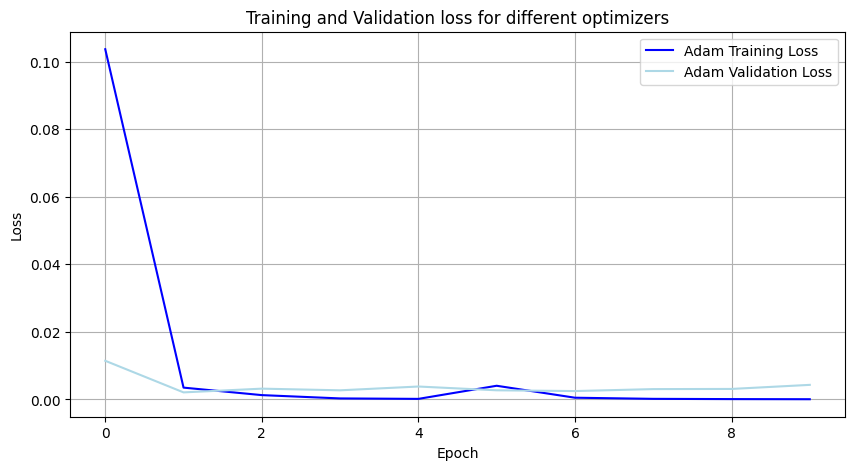

In [13]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['loss'], label="Adam Training Loss", color="blue")
plt.plot(adam_history.history['val_loss'], label="Adam Validation Loss", color="lightblue")

plt.title("Training and Validation loss for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

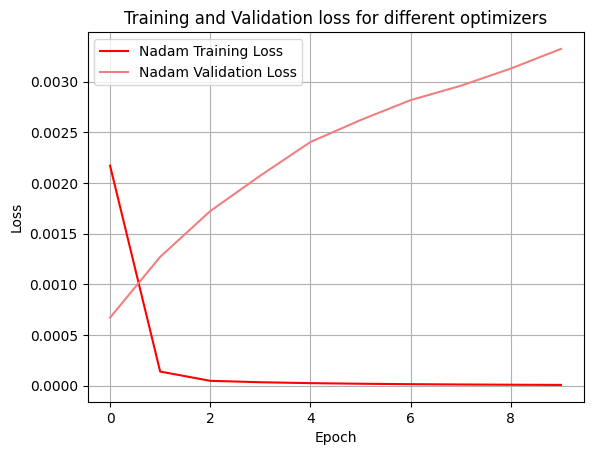

In [14]:
plt.plot(nadam_history.history['loss'], label="Nadam Training Loss", color="red")
plt.plot(nadam_history.history['val_loss'], label="Nadam Validation Loss", color="lightcoral")

plt.title("Training and Validation loss for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

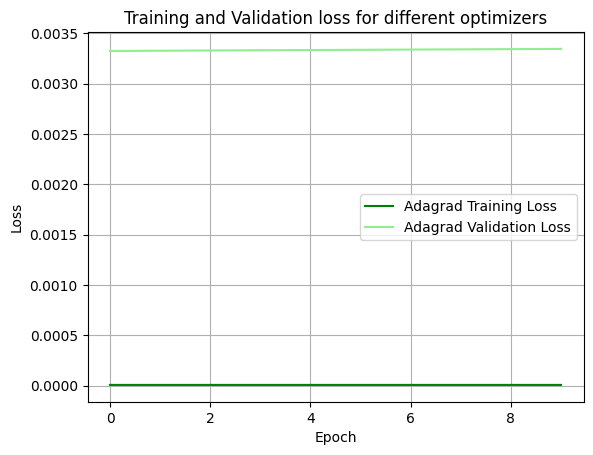

In [15]:
plt.plot(adagrad_history.history['loss'], label="Adagrad Training Loss", color="green")
plt.plot(adagrad_history.history['val_loss'], label="Adagrad Validation Loss", color="lightgreen")

plt.title("Training and Validation loss for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

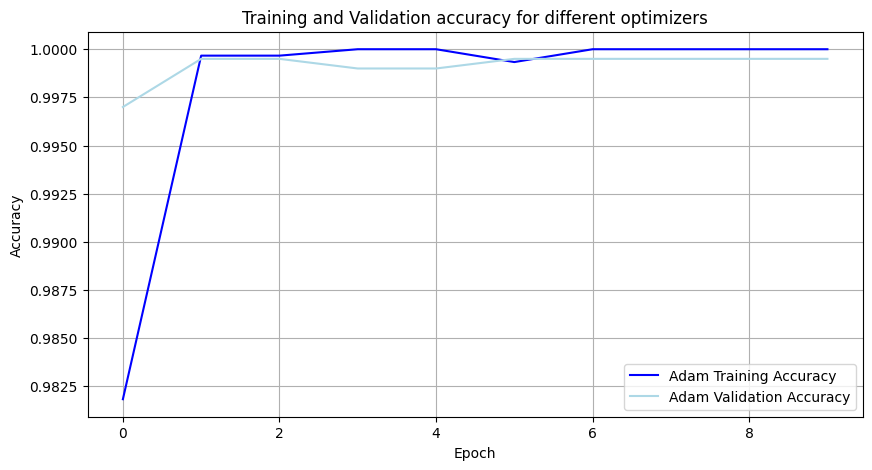

In [16]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['accuracy'], label="Adam Training Accuracy", color="blue")
plt.plot(adam_history.history['val_accuracy'], label="Adam Validation Accuracy", color="lightblue")

plt.title("Training and Validation accuracy for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

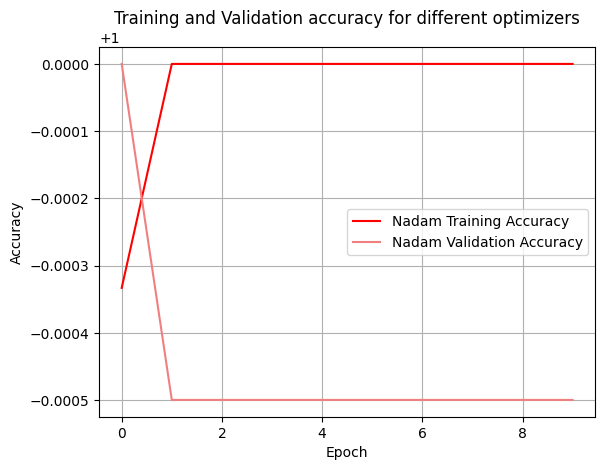

In [17]:
plt.plot(nadam_history.history['accuracy'], label="Nadam Training Accuracy", color="red")
plt.plot(nadam_history.history['val_accuracy'], label="Nadam Validation Accuracy", color="lightcoral")

plt.title("Training and Validation accuracy for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

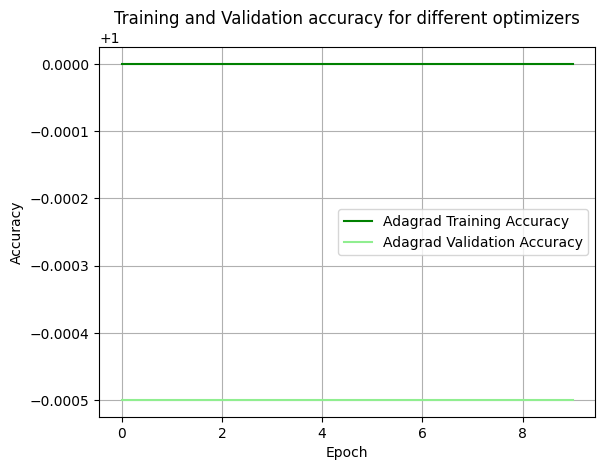

In [18]:
plt.plot(adagrad_history.history['accuracy'], label="Adagrad Training Accuracy", color="green")
plt.plot(adagrad_history.history['val_accuracy'], label="Adagrad Validation Accuracy", color="lightgreen")

plt.title("Training and Validation accuracy for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

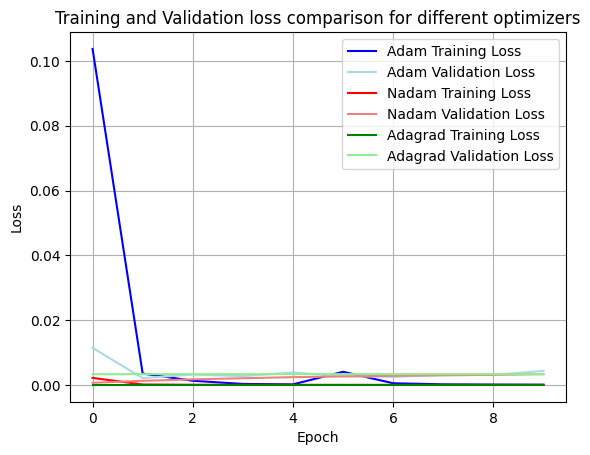

In [23]:
plt.plot(adam_history.history['loss'], label="Adam Training Loss", color="blue")
plt.plot(adam_history.history['val_loss'], label="Adam Validation Loss", color="lightblue")

plt.plot(nadam_history.history['loss'], label="Nadam Training Loss", color="red")
plt.plot(nadam_history.history['val_loss'], label="Nadam Validation Loss", color="lightcoral")

plt.plot(adagrad_history.history['loss'], label="Adagrad Training Loss", color="green")
plt.plot(adagrad_history.history['val_loss'], label="Adagrad Validation Loss", color="lightgreen")

plt.title("Training and Validation loss comparison for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

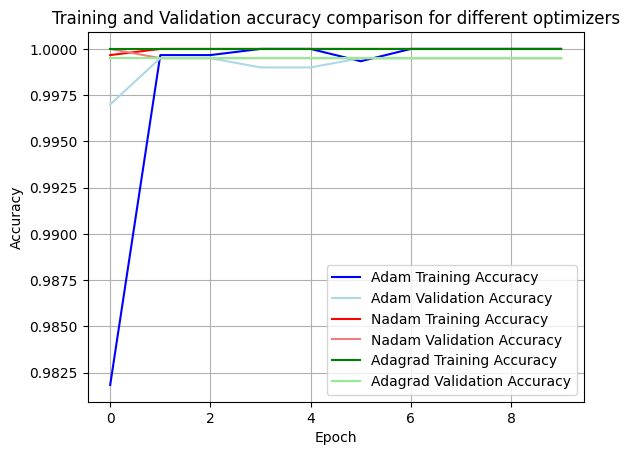

In [22]:
plt.plot(adam_history.history['accuracy'], label="Adam Training Accuracy", color="blue")
plt.plot(adam_history.history['val_accuracy'], label="Adam Validation Accuracy", color="lightblue")

plt.plot(nadam_history.history['accuracy'], label="Nadam Training Accuracy", color="red")
plt.plot(nadam_history.history['val_accuracy'], label="Nadam Validation Accuracy", color="lightcoral")

plt.plot(adagrad_history.history['accuracy'], label="Adagrad Training Accuracy", color="green")
plt.plot(adagrad_history.history['val_accuracy'], label="Adagrad Validation Accuracy", color="lightgreen")

plt.title("Training and Validation accuracy comparison for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()